# ソースコードを入力する前に確認しよう

```
from google.colab import drive
drive.mount('/content/drive')
```
を実行すると、カレントディレクトリ（今自分が見えるフォルダの場所）は content になる。

**次の mkdir を実行する前に、 content の位置を確認すること！！**


In [1]:
# 下記セルを実行すると、authorization codeの入力を求められます。
# 出力されたリンク先をクリックし、Googleアカウントにログインし、
# authorization codeをコピーし、貼り付けをおこなってください。
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


mkdir→ディレクトリの作成（フォルダの作成）

In [2]:
mkdir data

cd dataはせず、content をカレントディレクトリにしたまま、以下を実行していく。（cd はChange Directory の略）

# 4章を開始する前に、 content のフォルダの中が以下のとおりになっているか確認しよう。

content フォルダの中に data フォルダがあり、 data フォルダ内にテキストファイルがアップロードされていること！

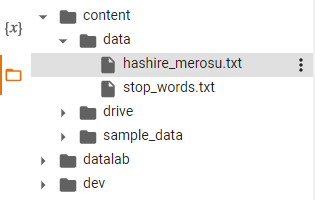

# ４章 言語データの加工・可視化を行う１０本ノック

## ノック５１：テキストファイルを読み込もう

In [3]:
ls data/

hashire_merosu.txt  stop_words.txt


In [7]:
with open("data/hashire_merosu.txt", mode = "r", encoding = "shiftjis") as f:
  content = f.read()
print(content)

走れメロス
太宰治

-------------------------------------------------------
【テキスト中に現れる記号について】

《》：ルビ
（例）邪智暴虐《じゃちぼうぎゃく》

｜：ルビの付く文字列の始まりを特定する記号
（例）疲労｜困憊《こんぱい》

［＃］：入力者注　主に外字の説明や、傍点の位置の指定
（例）［＃地から１字上げ］
-------------------------------------------------------

　メロスは激怒した。必ず、かの邪智暴虐《じゃちぼうぎゃく》の王を除かなければならぬと決意した。メロスには政治がわからぬ。メロスは、村の牧人である。笛を吹き、羊と遊んで暮して来た。けれども邪悪に対しては、人一倍に敏感であった。きょう未明メロスは村を出発し、野を越え山越え、十里はなれた此《こ》のシラクスの市にやって来た。メロスには父も、母も無い。女房も無い。十六の、内気な妹と二人暮しだ。この妹は、村の或る律気な一牧人を、近々、花婿《はなむこ》として迎える事になっていた。結婚式も間近かなのである。メロスは、それゆえ、花嫁の衣裳やら祝宴の御馳走やらを買いに、はるばる市にやって来たのだ。先ず、その品々を買い集め、それから都の大路をぶらぶら歩いた。メロスには竹馬の友があった。セリヌンティウスである。今は此のシラクスの市で、石工をしている。その友を、これから訪ねてみるつもりなのだ。久しく逢わなかったのだから、訪ねて行くのが楽しみである。歩いているうちにメロスは、まちの様子を怪しく思った。ひっそりしている。もう既に日も落ちて、まちの暗いのは当りまえだが、けれども、なんだか、夜のせいばかりでは無く、市全体が、やけに寂しい。のんきなメロスも、だんだん不安になって来た。路で逢った若い衆をつかまえて、何かあったのか、二年まえに此の市に来たときは、夜でも皆が歌をうたって、まちは賑やかであった筈《はず》だが、と質問した。若い衆は、首を振って答えなかった。しばらく歩いて老爺《ろうや》に逢い、こんどはもっと、語勢を強くして質問した。老爺は答えなかった。メロスは両手で老爺のからだをゆすぶって質問を重ねた。老爺は、あたりをはばかる低声で、わずか答えた。
「王様は、人を殺します。」
「なぜ殺すのだ。」
「悪心を抱いてい

## ノック５２：本文を抽出して１つに纏めよう

In [8]:
content = " ". join(content.split())
content

'走れメロス 太宰治 ------------------------------------------------------- 【テキスト中に現れる記号について】 《》：ルビ （例）邪智暴虐《じゃちぼうぎゃく》 ｜：ルビの付く文字列の始まりを特定する記号 （例）疲労｜困憊《こんぱい》 ［＃］：入力者注 主に外字の説明や、傍点の位置の指定 （例）［＃地から１字上げ］ ------------------------------------------------------- メロスは激怒した。必ず、かの邪智暴虐《じゃちぼうぎゃく》の王を除かなければならぬと決意した。メロスには政治がわからぬ。メロスは、村の牧人である。笛を吹き、羊と遊んで暮して来た。けれども邪悪に対しては、人一倍に敏感であった。きょう未明メロスは村を出発し、野を越え山越え、十里はなれた此《こ》のシラクスの市にやって来た。メロスには父も、母も無い。女房も無い。十六の、内気な妹と二人暮しだ。この妹は、村の或る律気な一牧人を、近々、花婿《はなむこ》として迎える事になっていた。結婚式も間近かなのである。メロスは、それゆえ、花嫁の衣裳やら祝宴の御馳走やらを買いに、はるばる市にやって来たのだ。先ず、その品々を買い集め、それから都の大路をぶらぶら歩いた。メロスには竹馬の友があった。セリヌンティウスである。今は此のシラクスの市で、石工をしている。その友を、これから訪ねてみるつもりなのだ。久しく逢わなかったのだから、訪ねて行くのが楽しみである。歩いているうちにメロスは、まちの様子を怪しく思った。ひっそりしている。もう既に日も落ちて、まちの暗いのは当りまえだが、けれども、なんだか、夜のせいばかりでは無く、市全体が、やけに寂しい。のんきなメロスも、だんだん不安になって来た。路で逢った若い衆をつかまえて、何かあったのか、二年まえに此の市に来たときは、夜でも皆が歌をうたって、まちは賑やかであった筈《はず》だが、と質問した。若い衆は、首を振って答えなかった。しばらく歩いて老爺《ろうや》に逢い、こんどはもっと、語勢を強くして質問した。老爺は答えなかった。メロスは両手で老爺のからだをゆすぶって質問を重ねた。老爺は、あたりをはばかる低声で、わずか答えた。 「王様は、人を殺します。」 「なぜ殺すのだ。」 「悪心を抱いている、という

In [9]:
import unicodedata
content = unicodedata.normalize("NFKC", content)
# 'NFKC' は正規化の形式。気になる人は 'NFKC' で検索してみよう
content

'走れメロス 太宰治 ------------------------------------------------------- 【テキスト中に現れる記号について】 《》:ルビ (例)邪智暴虐《じゃちぼうぎゃく》 |:ルビの付く文字列の始まりを特定する記号 (例)疲労|困憊《こんぱい》 [#]:入力者注 主に外字の説明や、傍点の位置の指定 (例)[#地から1字上げ] ------------------------------------------------------- メロスは激怒した。必ず、かの邪智暴虐《じゃちぼうぎゃく》の王を除かなければならぬと決意した。メロスには政治がわからぬ。メロスは、村の牧人である。笛を吹き、羊と遊んで暮して来た。けれども邪悪に対しては、人一倍に敏感であった。きょう未明メロスは村を出発し、野を越え山越え、十里はなれた此《こ》のシラクスの市にやって来た。メロスには父も、母も無い。女房も無い。十六の、内気な妹と二人暮しだ。この妹は、村の或る律気な一牧人を、近々、花婿《はなむこ》として迎える事になっていた。結婚式も間近かなのである。メロスは、それゆえ、花嫁の衣裳やら祝宴の御馳走やらを買いに、はるばる市にやって来たのだ。先ず、その品々を買い集め、それから都の大路をぶらぶら歩いた。メロスには竹馬の友があった。セリヌンティウスである。今は此のシラクスの市で、石工をしている。その友を、これから訪ねてみるつもりなのだ。久しく逢わなかったのだから、訪ねて行くのが楽しみである。歩いているうちにメロスは、まちの様子を怪しく思った。ひっそりしている。もう既に日も落ちて、まちの暗いのは当りまえだが、けれども、なんだか、夜のせいばかりでは無く、市全体が、やけに寂しい。のんきなメロスも、だんだん不安になって来た。路で逢った若い衆をつかまえて、何かあったのか、二年まえに此の市に来たときは、夜でも皆が歌をうたって、まちは賑やかであった筈《はず》だが、と質問した。若い衆は、首を振って答えなかった。しばらく歩いて老爺《ろうや》に逢い、こんどはもっと、語勢を強くして質問した。老爺は答えなかった。メロスは両手で老爺のからだをゆすぶって質問を重ねた。老爺は、あたりをはばかる低声で、わずか答えた。 「王様は、人を殺します。」 「なぜ殺すのだ。」 「悪心を抱いている、という

In [12]:
# import re は、正規表現操作 を行うためのモジュールのimport 
import re
pattern =re.compile(r"^.+(#地から1字上げ].+#地から1字上げ]).+$")
body = re.match(pattern, content).group(1)
print(body)

#地から1字上げ] ------------------------------------------------------- メロスは激怒した。必ず、かの邪智暴虐《じゃちぼうぎゃく》の王を除かなければならぬと決意した。メロスには政治がわからぬ。メロスは、村の牧人である。笛を吹き、羊と遊んで暮して来た。けれども邪悪に対しては、人一倍に敏感であった。きょう未明メロスは村を出発し、野を越え山越え、十里はなれた此《こ》のシラクスの市にやって来た。メロスには父も、母も無い。女房も無い。十六の、内気な妹と二人暮しだ。この妹は、村の或る律気な一牧人を、近々、花婿《はなむこ》として迎える事になっていた。結婚式も間近かなのである。メロスは、それゆえ、花嫁の衣裳やら祝宴の御馳走やらを買いに、はるばる市にやって来たのだ。先ず、その品々を買い集め、それから都の大路をぶらぶら歩いた。メロスには竹馬の友があった。セリヌンティウスである。今は此のシラクスの市で、石工をしている。その友を、これから訪ねてみるつもりなのだ。久しく逢わなかったのだから、訪ねて行くのが楽しみである。歩いているうちにメロスは、まちの様子を怪しく思った。ひっそりしている。もう既に日も落ちて、まちの暗いのは当りまえだが、けれども、なんだか、夜のせいばかりでは無く、市全体が、やけに寂しい。のんきなメロスも、だんだん不安になって来た。路で逢った若い衆をつかまえて、何かあったのか、二年まえに此の市に来たときは、夜でも皆が歌をうたって、まちは賑やかであった筈《はず》だが、と質問した。若い衆は、首を振って答えなかった。しばらく歩いて老爺《ろうや》に逢い、こんどはもっと、語勢を強くして質問した。老爺は答えなかった。メロスは両手で老爺のからだをゆすぶって質問を重ねた。老爺は、あたりをはばかる低声で、わずか答えた。 「王様は、人を殺します。」 「なぜ殺すのだ。」 「悪心を抱いている、というのですが、誰もそんな、悪心を持っては居りませぬ。」 「たくさんの人を殺したのか。」 「はい、はじめは王様の妹婿さまを。それから、御自身のお世嗣《よつぎ》を。それから、妹さまを。それから、妹さまの御子さまを。それから、皇后さまを。それから、賢臣のアレキス様を。」 「おどろいた。国王は乱心か。」 「いいえ、乱心ではございませぬ。人を、信ずる事が出来ぬ、とい

In [16]:
# テキスト内の文字は、結果の内容からコピー＆ペーストしましょう
body = body.replace("#地から1字上げ] -------------------------------------------------------", "")
body = body.replace("[#地から1字上げ]", "")
body

' メロスは激怒した。必ず、かの邪智暴虐《じゃちぼうぎゃく》の王を除かなければならぬと決意した。メロスには政治がわからぬ。メロスは、村の牧人である。笛を吹き、羊と遊んで暮して来た。けれども邪悪に対しては、人一倍に敏感であった。きょう未明メロスは村を出発し、野を越え山越え、十里はなれた此《こ》のシラクスの市にやって来た。メロスには父も、母も無い。女房も無い。十六の、内気な妹と二人暮しだ。この妹は、村の或る律気な一牧人を、近々、花婿《はなむこ》として迎える事になっていた。結婚式も間近かなのである。メロスは、それゆえ、花嫁の衣裳やら祝宴の御馳走やらを買いに、はるばる市にやって来たのだ。先ず、その品々を買い集め、それから都の大路をぶらぶら歩いた。メロスには竹馬の友があった。セリヌンティウスである。今は此のシラクスの市で、石工をしている。その友を、これから訪ねてみるつもりなのだ。久しく逢わなかったのだから、訪ねて行くのが楽しみである。歩いているうちにメロスは、まちの様子を怪しく思った。ひっそりしている。もう既に日も落ちて、まちの暗いのは当りまえだが、けれども、なんだか、夜のせいばかりでは無く、市全体が、やけに寂しい。のんきなメロスも、だんだん不安になって来た。路で逢った若い衆をつかまえて、何かあったのか、二年まえに此の市に来たときは、夜でも皆が歌をうたって、まちは賑やかであった筈《はず》だが、と質問した。若い衆は、首を振って答えなかった。しばらく歩いて老爺《ろうや》に逢い、こんどはもっと、語勢を強くして質問した。老爺は答えなかった。メロスは両手で老爺のからだをゆすぶって質問を重ねた。老爺は、あたりをはばかる低声で、わずか答えた。 「王様は、人を殺します。」 「なぜ殺すのだ。」 「悪心を抱いている、というのですが、誰もそんな、悪心を持っては居りませぬ。」 「たくさんの人を殺したのか。」 「はい、はじめは王様の妹婿さまを。それから、御自身のお世嗣《よつぎ》を。それから、妹さまを。それから、妹さまの御子さまを。それから、皇后さまを。それから、賢臣のアレキス様を。」 「おどろいた。国王は乱心か。」 「いいえ、乱心ではございませぬ。人を、信ずる事が出来ぬ、というのです。このごろは、臣下の心をも、お疑いになり、少しく派手な暮しをしている者には、人質ひとりずつ差し出すことを命じて居ります。

## ノック５３：本文以外の項目を取り出そう

In [18]:
with open("data/hashire_merosu.txt", mode = "r", encoding = "shiftjis") as f:
  title = f.readline()
  author = f.readline()
print(title)
print(author)

走れメロス

太宰治



In [19]:
title = title.replace("\n", "")
print(title)
author = author.replace("\n", "")
print(author)

走れメロス
太宰治


In [20]:
with open("data/hashire_merosu.txt", mode = "r", encoding = "shiftjis") as f:
  content = f.readlines()
content

['走れメロス\n',
 '太宰治\n',
 '\n',
 '-------------------------------------------------------\n',
 '【テキスト中に現れる記号について】\n',
 '\n',
 '《》：ルビ\n',
 '（例）邪智暴虐《じゃちぼうぎゃく》\n',
 '\n',
 '｜：ルビの付く文字列の始まりを特定する記号\n',
 '（例）疲労｜困憊《こんぱい》\n',
 '\n',
 '［＃］：入力者注\u3000主に外字の説明や、傍点の位置の指定\n',
 '（例）［＃地から１字上げ］\n',
 '-------------------------------------------------------\n',
 '\n',
 '\u3000メロスは激怒した。必ず、かの邪智暴虐《じゃちぼうぎゃく》の王を除かなければならぬと決意した。メロスには政治がわからぬ。メロスは、村の牧人である。笛を吹き、羊と遊んで暮して来た。けれども邪悪に対しては、人一倍に敏感であった。きょう未明メロスは村を出発し、野を越え山越え、十里はなれた此《こ》のシラクスの市にやって来た。メロスには父も、母も無い。女房も無い。十六の、内気な妹と二人暮しだ。この妹は、村の或る律気な一牧人を、近々、花婿《はなむこ》として迎える事になっていた。結婚式も間近かなのである。メロスは、それゆえ、花嫁の衣裳やら祝宴の御馳走やらを買いに、はるばる市にやって来たのだ。先ず、その品々を買い集め、それから都の大路をぶらぶら歩いた。メロスには竹馬の友があった。セリヌンティウスである。今は此のシラクスの市で、石工をしている。その友を、これから訪ねてみるつもりなのだ。久しく逢わなかったのだから、訪ねて行くのが楽しみである。歩いているうちにメロスは、まちの様子を怪しく思った。ひっそりしている。もう既に日も落ちて、まちの暗いのは当りまえだが、けれども、なんだか、夜のせいばかりでは無く、市全体が、やけに寂しい。のんきなメロスも、だんだん不安になって来た。路で逢った若い衆をつかまえて、何かあったのか、二年まえに此の市に来たときは、夜でも皆が歌をうたって、まちは賑やかであった筈《はず》だが、と質問した。若い衆は、首を振って答えなかった。しばらく歩いて老爺《ろうや》に逢い、こんどは

In [21]:
import pandas as pd
df = pd.DataFrame(content, columns = ["text"])
df["text"] = df["text"].str.replace("\n", "")
df

,text
0,走れメロス
1,太宰治
2,
3,----------------------------------------------...
4,【テキスト中に現れる記号について】
...,...
100,校正：高橋美奈子
101,2000年12月4日公開
102,2011年1月17日修正
103,青空文庫作成ファイル：


In [25]:
from datetime import date
date = df[(df["text"].str.contains("日公開"))|(df["text"].str.contains("日修正"))].copy()
print(date)

date["text"] = date["text"].str.replace("公開", "")
date["text"] = date["text"].str.replace("修正", "")
print(date)

date["text"] = date["text"].str.replace("年", "/")
date["text"] = date["text"].str.replace("月", "/")
date["text"] = date["text"].str.replace("日", "/")
print(date)

date["text"] = pd.to_datetime(date["text"])
print(date)
date.dtypes

             text
101  2000年12月4日公開
102  2011年1月17日修正
           text
101  2000年12月4日
102  2011年1月17日
           text
101  2000/12/4/
102  2011/1/17/
          text
101 2000-12-04
102 2011-01-17


text    datetime64[ns]
dtype: object

In [28]:
from platform import release
release_date = date.iat[0, 0]
update_date = date.iat[1, 0]
print(release_date)
print(update_date)
date = update_date - release_date
print(date)

2000-12-04 00:00:00
2011-01-17 00:00:00
3696 days 00:00:00


In [30]:
booklist = pd.DataFrame([[title, author, release_date, update_date, body]], columns = ["title", "author", "release_date", "update_date", "body"])
booklist

,title,author,release_date,update_date,body
0,走れメロス,太宰治,2000-12-04,2011-01-17,メロスは激怒した。必ず、かの邪智暴虐《じゃちぼうぎゃく》の王を除かなければならぬと決意した...


## ノック５４：形態素解析で単語に分割しよう

形態素解析 とは…文章を最小の単位に分割すること

MeCab を使います！

以下 %%bash と記載のあるコード、次の pip から始まるコードはそのまま実行してください。

In [31]:
%%bash

apt install -yq \
  mecab \
  mecab-ipadic-utf8 \
  libmecab-dev
pip install -q mecab-python3==0.996.5
ln -s /etc/mecabrc /usr/local/etc/mecabrc

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-jumandic mecab-jumandic-utf8 mecab-utils
The following NEW packages will be installed:
  libmecab-dev libmecab2 mecab mecab-ipadic mecab-ipadic-utf8 mecab-jumandic
  mecab-jumandic-utf8 mecab-utils
0 upgraded, 8 newly installed, 0 to remove and 37 not upgraded.
Need to get 29.0 MB of archives.
After this operation, 277 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab2 amd64 0.996-5 [257 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab-dev amd64 0.996-5 [308 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 mecab-utils amd64 0.996-5 [4,856 B]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 mecab-jumandic-utf8 all 7.0-20130310-4 [16.2 MB]
Get:5 http://archive.ubuntu.com/ubuntu bionic/universe amd64 mecab-jumand

In [32]:
pip list | grep mecab

mecab-python3                 0.996.5


In [40]:
# MeCab をimport
import MeCab
tagger = MeCab.Tagger()
body = booklist.iloc[0, 4]
parsed = tagger.parse(body).split("\n")
parsed[:4]
# parsed には、最小単位に分割された文章が入っている
# parsed に何が入っているのかも確認してみよう

['メロス\t名詞,一般,*,*,*,*,*',
 'は\t助詞,係助詞,*,*,*,*,は,ハ,ワ',
 '激怒\t名詞,サ変接続,*,*,*,*,激怒,ゲキド,ゲキド',
 'し\t動詞,自立,*,*,サ変・スル,連用形,する,シ,シ']

In [42]:
parsed[-4:]

['た\t助動詞,*,*,*,特殊・タ,基本形,た,タ,タ', '。\t記号,句点,*,*,*,*,。,。,。', 'EOS', '']

In [43]:
parsed = parsed[:-2]
parsed[-4:]

['赤面\t名詞,サ変接続,*,*,*,*,赤面,セキメン,セキメン',
 'し\t動詞,自立,*,*,サ変・スル,連用形,する,シ,シ',
 'た\t助動詞,*,*,*,特殊・タ,基本形,た,タ,タ',
 '。\t記号,句点,*,*,*,*,。,。,。']

## ノック５５：分割した単語をデータフレームで保持しよう

**補足**

変数名の左に「*」がついている意味：
引数をリスト/タプルなどの可変長の、という意味になる。


lambda の意味：
「lambda 引数 : 戻り値」で記載する。以下のような関数を lambda で表現する

```
def test(引数):
    return 返り値
```
以下の①と②は同じ処理を行っている。

```
①
def nijo(n):
    return n * 2
```

```
②
lambda n: n * 2
```

# *values, = map(lambda s: re.split(r'\t|,', s), parsed)

*values の後にカンマがあることに注意！

In [60]:
*values, = map(lambda s: re.split(r"\t|,", s), parsed)
values[:4]

[['メロス', '名詞', '一般', '*', '*', '*', '*', '*'],
 ['は', '助詞', '係助詞', '*', '*', '*', '*', 'は', 'ハ', 'ワ'],
 ['激怒', '名詞', 'サ変接続', '*', '*', '*', '*', '激怒', 'ゲキド', 'ゲキド'],
 ['し', '動詞', '自立', '*', '*', 'サ変・スル', '連用形', 'する', 'シ', 'シ']]

In [61]:
import pandas as pd
columns = ['表層形', '品詞', '品詞細分類1', '品詞細分類2', '品詞細分類3', '活用型', '活用形', '原形', '読み', '発音']
mecab_df = pd.DataFrame(data=values, columns=columns)
print(len(mecab_df))
mecab_df.head(4)

6712


,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
0,メロス,名詞,一般,*,*,*,*,*,None,None
1,は,助詞,係助詞,*,*,*,*,は,ハ,ワ
2,激怒,名詞,サ変接続,*,*,*,*,激怒,ゲキド,ゲキド
3,し,動詞,自立,*,*,サ変・スル,連用形,する,シ,シ


## ノック５６：名詞と動詞を取り出そう

In [62]:
print(mecab_df.groupby(["原形", "品詞"]).size().sort_values(ascending = False))

原形  品詞
、   記号    555
。   記号    458
は   助詞    268
て   助詞    237
の   助詞    225
         ... 
国王  名詞      1
囲み  名詞      1
困憊  名詞      1
四肢  名詞      1
齧る  動詞      1
Length: 1325, dtype: int64


In [79]:
noun = mecab_df.loc[mecab_df["品詞"] == "名詞"]
noun

,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
0,メロス,名詞,一般,*,*,*,*,*,None,None
2,激怒,名詞,サ変接続,*,*,*,*,激怒,ゲキド,ゲキド
9,邪智,名詞,一般,*,*,*,*,邪智,ジャチ,ジャチ
10,暴虐,名詞,一般,*,*,*,*,暴虐,ボウギャク,ボーギャク
13,ゃちぼうぎゃく,名詞,固有名詞,組織,*,*,*,*,None,None
...,...,...,...,...,...,...,...,...,...,...
6691,皆,名詞,代名詞,一般,*,*,*,皆,ミナ,ミナ
6695,の,名詞,非自立,一般,*,*,*,の,ノ,ノ
6700,の,名詞,非自立,一般,*,*,*,の,ノ,ノ
6704,勇者,名詞,一般,*,*,*,*,勇者,ユウシャ,ユーシャ


In [80]:
verb = mecab_df.loc[(mecab_df["品詞"] == "名詞")|(mecab_df["品詞"] == "動詞")]
verb

,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
0,メロス,名詞,一般,*,*,*,*,*,None,None
2,激怒,名詞,サ変接続,*,*,*,*,激怒,ゲキド,ゲキド
3,し,動詞,自立,*,*,サ変・スル,連用形,する,シ,シ
9,邪智,名詞,一般,*,*,*,*,邪智,ジャチ,ジャチ
10,暴虐,名詞,一般,*,*,*,*,暴虐,ボウギャク,ボーギャク
...,...,...,...,...,...,...,...,...,...,...
6695,の,名詞,非自立,一般,*,*,*,の,ノ,ノ
6700,の,名詞,非自立,一般,*,*,*,の,ノ,ノ
6704,勇者,名詞,一般,*,*,*,*,勇者,ユウシャ,ユーシャ
6708,赤面,名詞,サ変接続,*,*,*,*,赤面,セキメン,セキメン


## ノック５７：不要な単語を除外しよう

In [81]:
with open("data/stop_words.txt", mode = "r") as f:
  stop_words = f.read().split()
stop_words

['する', 'いる', 'なる', 'れる', 'よう']

In [82]:
print(len(noun))
noun = noun.loc[~noun["原形"].isin(stop_words)]
print(len(noun))
display(noun.head())

print(len(verb))
verb = verb.loc[~verb["原形"].isin(stop_words)]
print(len(verb))
display(verb.head())

1686
1673


,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
0,メロス,名詞,一般,*,*,*,*,*,None,None
2,激怒,名詞,サ変接続,*,*,*,*,激怒,ゲキド,ゲキド
9,邪智,名詞,一般,*,*,*,*,邪智,ジャチ,ジャチ
10,暴虐,名詞,一般,*,*,*,*,暴虐,ボウギャク,ボーギャク
13,ゃちぼうぎゃく,名詞,固有名詞,組織,*,*,*,*,None,None


2666
2448


,表層形,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
0,メロス,名詞,一般,*,*,*,*,*,None,None
2,激怒,名詞,サ変接続,*,*,*,*,激怒,ゲキド,ゲキド
9,邪智,名詞,一般,*,*,*,*,邪智,ジャチ,ジャチ
10,暴虐,名詞,一般,*,*,*,*,暴虐,ボウギャク,ボーギャク
13,ゃちぼうぎゃく,名詞,固有名詞,組織,*,*,*,*,None,None


## ノック５８：単語の使用状況をグラフで可視化しよう

In [108]:
count = noun.groupby("原形").size().sort_values(ascending = False)
count.name = "count"
count = count.reset_index().head(10)
count

,原形,count
0,*,155
1,の,78
2,私,76
3,人,30
4,おまえ,20
5,王,19
6,友,18
7,事,15
8,君,13
9,妹,12


In [84]:
!pip install -q japanize-matplotlib

     |████████████████████████████████| 4.1 MB 4.5 MB/s 


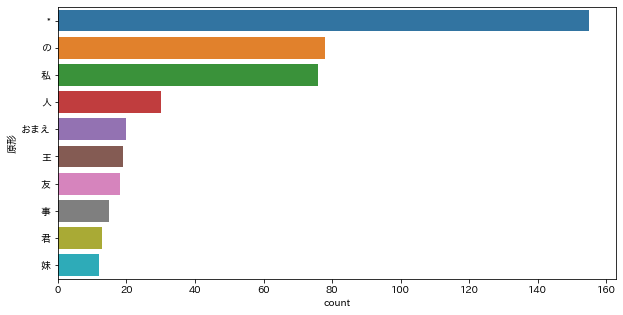

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
plt.figure(figsize=(10, 5))
sns.barplot(x=count['count'], y=count['原形'])

## ノック５９：単語の傾向をWordCloudで可視化してみよう

In [ ]:
以下の「!apt-get -yq install fonts-ipafont-gothic」はそのまま実行してください

In [87]:
!apt-get -yq install fonts-ipafont-gothic

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 1s (6,583 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 155407 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-18ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-18ubuntu1) ...
Selecting previously unselected package fonts-ipafont-mincho.


In [88]:
ls /usr/share/fonts/opentype/ipafont-gothic

ipagp.ttf  ipag.ttf


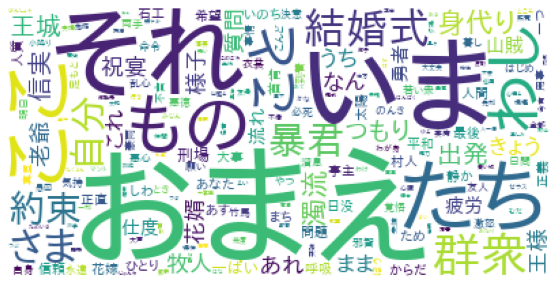

In [99]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import japanize_matplotlib

font_path = 'usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'

cloud = WordCloud(background_color='white', font_path=font_path).generate(' '.join(noun['原形'].values))

plt.figure(figsize=(10, 5))

plt.imshow(cloud)
plt.axis("off")
plt.savefig('data/wc_noun_base_2.png')
plt.show()

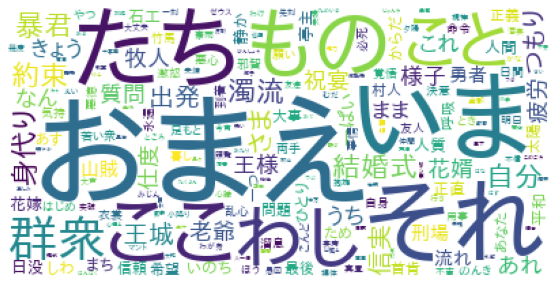

In [102]:
# 1行目のみ穴埋め。前のセルから必要な部分をコピペして
cloud = WordCloud(background_color='white', font_path=font_path).generate(' '.join(noun['原形'].values))
plt.figure(figsize=(10, 5))
plt.imshow(cloud)
plt.axis("off")
plt.savefig('data/wc_noun_base_1.png')
plt.show()

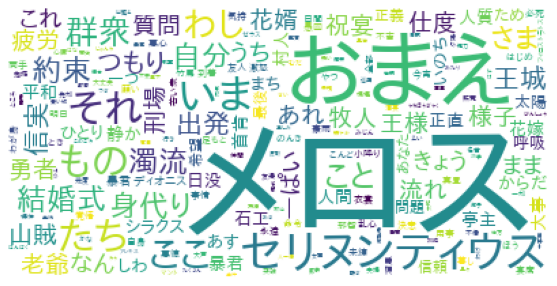

In [103]:
# 1行目のみ穴埋め。前のセルから必要な部分をコピペして
cloud = WordCloud(background_color='white', font_path=font_path).generate(' '.join(noun['表層形'].values))
plt.figure(figsize=(10, 5))
plt.imshow(cloud)
plt.axis("off")
plt.savefig('data/wc_noun_surface.png')
plt.show()

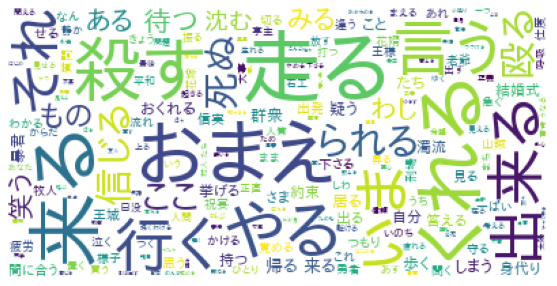

In [104]:
# 1行目のみ穴埋め。前のセルから必要な部分をコピペして
cloud = WordCloud(background_color='white', font_path=font_path).generate(' '.join(verb['原形'].values))
plt.figure(figsize=(10, 5))
plt.imshow(cloud)
plt.axis("off")
plt.savefig('data/wc_noun-verb_base.png')
plt.show()

## ノック６０：n-gramを作ってみよう

In [105]:
target = mecab_df['表層形'].to_list()
len(target)

6712

In [106]:
from nltk import ngrams
bigram = ngrams(target, 2)

In [107]:
import collections
counter = collections.Counter(bigram)
print(counter)

Counter({('た', '。'): 142, ('は', '、'): 129, ('だ', '。'): 72, ('。', '」'): 55, ('メロス', 'は'): 47, ('の', 'だ'): 45, ('て', '、'): 39, ('私', 'は'): 36, ('。', '私'): 34, ('。', 'メロス'): 33, ('て', 'いる'): 33, ('。', '「'): 31, ('し', 'た'): 25, ('し', 'て'): 25, ('」', '「'): 24, ('に', 'は'): 22, ('た', 'の'): 22, ('ぬ', '。'): 21, ('が', '、'): 21, ('も', '、'): 20, ('を', '、'): 18, ('に', '、'): 18, ('、', 'メロス'): 18, ('て', 'くれ'): 18, ('、', '私'): 17, ('て', '来'): 16, ('私', 'を'): 16, ('無い', '。'): 15, ('で', '、'): 15, ('ああ', '、'): 15, ('ある', '。'): 14, ('来', 'た'): 14, ('い', 'た'): 14, ('なら', 'ぬ'): 13, ('で', 'ある'): 13, ('て', 'い'): 13, ('れ', 'た'): 13, ('ない', '。'): 13, ('》', 'の'): 12, ('の', 'は'): 12, ('、', 'と'): 12, ('ます', '。'): 12, ('う', '。'): 12, ('あっ', 'た'): 11, ('に', 'なっ'): 11, ('いる', '。'): 11, ('で', 'は'): 11, ('か', '。'): 11, ('私', 'の'): 11, ('なっ', 'て'): 10, ('。', 'おまえ'): 10, ('で', 'あっ'): 9, ('の', '、'): 9, ('人', 'を'): 9, ('」', 'メロス'): 9, ('メロス', 'の'): 9, ('よう', 'に'): 9, ('帰っ', 'て'): 9, ('。', 'ああ'): 9, ('。', 'その'): 8, ('から', '